In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

__REFERENCE WEBSITE__ <br>
http://h1bdata.info

In [2]:
def collect_tables(target):
    # access website, populate form, get results as html
    url = "http://h1bdata.info/index.php?em={}".format(target)
    content = requests.get(url).text
    
    #process the html code
    soup = BeautifulSoup(content)
    table = soup.find("tbody")  #go to table body
    colnames = [tag.text for tag in soup.find("thead").find_all("th")]  #fetch Column headers

    #cycle through tags and populate df with contents
    df = pd.DataFrame(
        ((tag.text for tag in lst.find_all("td")) for lst in table.find_all("tr")),
        columns = colnames
    )
    return df

### Fetch the Data from the Web

In [3]:
#list of companies for which to fetch data
targets = ["Bloomberg", "Factset"]

#iteratively call the UDF for each company in the list
collection = [collect_tables(target) for target in targets]

C:\Users\traveler\Anaconda3\envs\py35\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\traveler\Anaconda3\envs\py35\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [4]:
collection[0].head()

,EMPLOYER,JOB TITLE,BASE SALARY,LOCATION,SUBMIT DATE,START DATE,CASE STATUS
0,BLOOMBERG LP,ABAP DEVELOPER,"135,000","NEW YORK, NY",02/18/2014,03/03/2014,CERTIFIED
1,BLOOMBERG LP,ABAP DEVELOPER,"145,000","NEW YORK, NY",02/18/2014,08/01/2014,CERTIFIED
2,BLOOMBERG LP,ACCOUNT MANAGER,"87,500","NEW YORK, NY",03/15/2016,09/01/2016,CERTIFIED
3,BLOOMBERG LP,ACCOUNT MANAGER,"89,500","NEW YORK, NY",01/30/2018,07/26/2018,CERTIFIED
4,BLOOMBERG LP,ACCOUNT MANAGER,"100,000","NEW YORK, NY",01/30/2018,07/26/2018,CERTIFIED


In [5]:
collection[1].head()

,EMPLOYER,JOB TITLE,BASE SALARY,LOCATION,SUBMIT DATE,START DATE,CASE STATUS
0,FACTSET RESEARCH SYSTEMS INC,AMERICAS GLOBAL BANKS GBB STRATEGIC CONSULTANT,"63,086","NEW YORK, NY",03/10/2015,09/05/2015,CERTIFIED
1,FACTSET RESEARCH SYSTEMS INC,ANALYTICS RESEARCH ASSISTANT,"96,000","NEW YORK, NY",03/03/2017,08/30/2017,CERTIFIED
2,FACTSET RESEARCH SYSTEMS INC,ASSOCIATE CONTENT MANAGER,"37,100","YOUNGSTOWN, OH",03/09/2017,08/24/2017,CERTIFIED
3,FACTSET RESEARCH SYSTEMS INC,ASSOCIATE CONTENT MANAGER,"60,000","NORWALK, CT",04/09/2015,04/20/2015,CERTIFIED
4,FACTSET RESEARCH SYSTEMS INC,ASSOCIATE CONTENT MANAGER,"60,000","NORWALK, CT",04/07/2014,10/02/2014,CERTIFIED


In [6]:
#combine the indiviual dataframes into one big dataframe
df = pd.concat(collection).reset_index(drop=True)
df.tail()

,EMPLOYER,JOB TITLE,BASE SALARY,LOCATION,SUBMIT DATE,START DATE,CASE STATUS
2797,FACTSET RESEARCH SYSTEMS INC,TECHNICAL CONSULTANT,"100,000","LOS ANGELES, CA",03/21/2018,06/04/2018,CERTIFIED
2798,FACTSET RESEARCH SYSTEMS INC,UNIVERSAL SCREENING APPLICATION MANAGER,"117,000","NORWALK, CT",03/06/2015,09/02/2015,CERTIFIED
2799,FACTSET RESEARCH SYSTEMS INC,"VICE PRESIDENT, ASSOCIATE DIRECTOR, SALES AND ...","140,000","NORWALK, CT",08/31/2017,02/20/2018,CERTIFIED
2800,FACTSET RESEARCH SYSTEMS INC,"VICE PRESIDENT, ASSOCIATE DIRECTOR, SALES AND ...","140,000","NORWALK, CT",09/06/2017,02/20/2018,CERTIFIED
2801,FACTSET RESEARCH SYSTEMS INC,"VICE PRESIDENT, ASSOCIATE DIRECTOR, SALES AND ...","161,512","NORWALK, CT",01/16/2018,02/20/2018,CERTIFIED


In [7]:
df.columns

Index(['EMPLOYER', 'JOB TITLE', 'BASE SALARY', 'LOCATION', 'SUBMIT DATE',
       'START DATE', 'CASE STATUS'],
      dtype='object')

In [8]:
len(df)

2802

### Clean the Data

In [9]:
#get a fresh DF
df_ = pd.concat(collection).reset_index(drop=True)

#strip the comma, cast to 'int'
df_['BASE SALARY'] = df_['BASE SALARY'].str.replace(',','').astype(int)
type(df_['BASE SALARY'][0])

numpy.int32

In [10]:
#add a column for the state state
newcol = df_['LOCATION'].apply(lambda x: x.split(', ') [-1])
df_['STATE'] = newcol
df_.head()

,EMPLOYER,JOB TITLE,BASE SALARY,LOCATION,SUBMIT DATE,START DATE,CASE STATUS,STATE
0,BLOOMBERG LP,ABAP DEVELOPER,135000,"NEW YORK, NY",02/18/2014,03/03/2014,CERTIFIED,NY
1,BLOOMBERG LP,ABAP DEVELOPER,145000,"NEW YORK, NY",02/18/2014,08/01/2014,CERTIFIED,NY
2,BLOOMBERG LP,ACCOUNT MANAGER,87500,"NEW YORK, NY",03/15/2016,09/01/2016,CERTIFIED,NY
3,BLOOMBERG LP,ACCOUNT MANAGER,89500,"NEW YORK, NY",01/30/2018,07/26/2018,CERTIFIED,NY
4,BLOOMBERG LP,ACCOUNT MANAGER,100000,"NEW YORK, NY",01/30/2018,07/26/2018,CERTIFIED,NY


### Basic Aggregation

In [11]:
agglist = ('count','mean', 'min', 'max')
pd.set_option('precision',3)

temp3 = df_.pivot_table('BASE SALARY', index = ["EMPLOYER"], aggfunc = agglist)

temp3.sort_values('count', ascending=False)

,count,mean,min,max
EMPLOYER,,,,
BLOOMBERG LP,2130,142303.227,45000,585000
FACTSET RESEARCH SYSTEMS INC,653,92029.936,30035,210000
BLOOMBERG TRADEBOOK LLC,9,180944.444,50000,315000
BLOOMBERG POLARLAKE USA LLC,4,118500.000,118000,120000
BLOOMBERG INDEX SERVICES LIMITED,3,103333.333,70000,135000
BLOOMBERG ASSOCIATES LLC,2,70000.000,65000,75000
BLOOMBERG STP LLC,1,145500.000,145500,145500


In [ ]:
factset= df_[df_['EMPLOYER']=='FACTSET RESEARCH SYSTEMS INC']
factset

In [34]:
factset['JOB TITLE'].value_counts()

SOFTWARE_ENGINEER                                               477
FINANCIAL ENGINEER                                               36
DEVELOPER_                                                       23
SYSTEMS ENGINEER                                                 16
MACHINE_LEARNING                                                 12
ASSOCIATE CONTENT MANAGER                                         8
PRODUCT MANAGER                                                   8
BUSINESS ANALYST                                                  5
QUALITY ASSURANCE ENGINEER                                        3
CONTENT SPECIALIST                                                3
SOLUTIONS ARCHITECT                                               3
SENIOR SYSTEMS ENGINEER                                           3
NLP/ML TECHNICAL LEAD                                             3
SENIOR PRODUCT MANAGER                                            3
RESEARCH ASSOCIATE                              

In [13]:
#show types of jobs
df_['JOB TITLE'].value_counts()

SENIOR SOFTWARE DEVELOPER                        754
SOFTWARE ENGINEER                                484
SOFTWARE DEVELOPER                               335
TEAM LEADER                                      171
SENIOR SOFTWARE ENGINEER                          63
FINANCIAL ENGINEER                                44
REPORTER                                          34
FIS REPRESENTATIVE                                24
PRODUCT MANAGER                                   21
EDITOR                                            20
SYSTEMS ENGINEER                                  17
QUANTITATIVE ANALYST                              16
DATA ANALYST                                      15
SAP ABAP DEVELOPER                                13
LEAD SOFTWARE ENGINEER                            13
MACHINE LEARNING ENGINEER                         12
UX DESIGNER                                       11
IMPLEMENTATION SPECIALIST                         10
FINANCIAL INFORMATION SERVICES REPRESENTATIVE 

#### Factset Only

In [14]:
#show types of jobs
df_2 = collection[1] #Factsets df

df_2['BASE SALARY']= df_2['BASE SALARY'].str.replace(',','').astype(int)

df_2['JOB TITLE'].value_counts()

SOFTWARE ENGINEER                                               434
FINANCIAL ENGINEER                                               36
SENIOR SOFTWARE ENGINEER                                         24
SYSTEMS ENGINEER                                                 16
LEAD SOFTWARE ENGINEER                                           13
MACHINE LEARNING ENGINEER                                        12
SOFTWARE DEVELOPER                                                9
PRODUCT MANAGER                                                   8
ASSOCIATE CONTENT MANAGER                                         8
PRODUCT DEVELOPER                                                 8
SENIOR SOFTWARE DEVELOPER                                         5
BUSINESS ANALYST                                                  5
QUALITY ASSURANCE ENGINEER                                        3
NLP/ML TECHNICAL LEAD                                             3
CONTENT SPECIALIST                              

In [ ]:
%matplotlib inline

agglist = ('count', 'mean', 'max')
new = df_2.pivot_table('BASE SALARY', index='JOB TITLE', aggfunc=agglist)
new.sort_values('mean', ascending = False)

EMPLOYER
FACTSET RESEARCH SYSTEMS INC    Axes(0.125,0.125;0.775x0.755)
Name: BASE SALARY, dtype: object

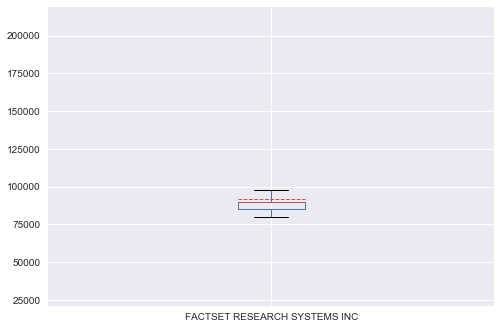

In [24]:
df_2.groupby(['EMPLOYER'])['BASE SALARY'].plot(kind='box', legend = True, meanline = True, showmeans=True)


EMPLOYER
FACTSET RESEARCH SYSTEMS INC    Axes(0.125,0.125;0.775x0.755)
Name: BASE SALARY, dtype: object

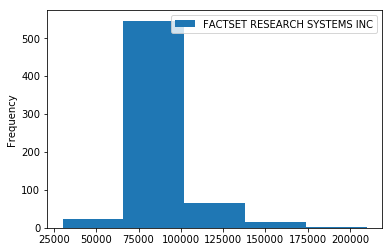

In [16]:

df_2.groupby(['EMPLOYER'])['BASE SALARY'].plot(kind='hist', legend = True, bins=5)


### Merge Titles in main DF

In [25]:
#two ways to merge similar titles 
#method1
df_['JOB TITLE'][df_['JOB TITLE'].str.contains('SOFTWARE ENGINEER')] ="SOFTWARE_ENGINEER"

#method2
df_['JOB TITLE']= df_['JOB TITLE'].apply(lambda x: "MACHINE_LEARNING" if "MACHINE LEARNING" in x else x)

##bonus grouping
df_['JOB TITLE'][df_['JOB TITLE'].str.contains('DEVELOPER')] ="DEVELOPER_"


df_['JOB TITLE'].value_counts()

C:\Users\traveler\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\traveler\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


DEVELOPER_                                       1170
SOFTWARE_ENGINEER                                 572
TEAM LEADER                                       171
FINANCIAL ENGINEER                                 44
REPORTER                                           34
FIS REPRESENTATIVE                                 24
PRODUCT MANAGER                                    21
EDITOR                                             20
SYSTEMS ENGINEER                                   17
QUANTITATIVE ANALYST                               16
DATA ANALYST                                       15
MACHINE_LEARNING                                   14
UX DESIGNER                                        11
FINANCIAL INFORMATION SERVICES REPRESENTATIVE      10
RESEARCH ASSOCIATE                                 10
IMPLEMENTATION SPECIALIST                          10
REGULATORY REPRESENTATIVE                           8
ACCOUNT MANAGER                                     8
ASSOCIATE CONTENT MANAGER   

In [28]:
%matplotlib inline
import seaborn as sns
sns.set()

#filter/sub-set just on a single job description
position1 = df_[df_['JOB TITLE'] == 'MACHINE_LEARNING']
position1

,EMPLOYER,JOB TITLE,BASE SALARY,LOCATION,SUBMIT DATE,START DATE,CASE STATUS,STATE
359,BLOOMBERG LP,MACHINE_LEARNING,150000,"NEW YORK, NY",08/18/2014,09/02/2014,CERTIFIED,NY
650,BLOOMBERG LP,MACHINE_LEARNING,220000,"NEW YORK, NY",05/26/2017,07/17/2017,CERTIFIED,NY
2234,FACTSET RESEARCH SYSTEMS INC,MACHINE_LEARNING,90000,"NEW YORK, NY",03/03/2017,08/30/2017,DENIED,NY
2235,FACTSET RESEARCH SYSTEMS INC,MACHINE_LEARNING,90000,"NEW YORK, NY",03/03/2017,08/30/2017,CERTIFIED,NY
2236,FACTSET RESEARCH SYSTEMS INC,MACHINE_LEARNING,90000,"NEW YORK, NY",03/03/2017,08/30/2017,CERTIFIED,NY
2237,FACTSET RESEARCH SYSTEMS INC,MACHINE_LEARNING,95000,"NEW YORK, NY",03/05/2018,09/04/2018,CERTIFIED,NY
2238,FACTSET RESEARCH SYSTEMS INC,MACHINE_LEARNING,95000,"NEW YORK, NY",03/05/2018,09/04/2018,CERTIFIED,NY
2239,FACTSET RESEARCH SYSTEMS INC,MACHINE_LEARNING,95000,"NEW YORK, NY",03/05/2018,09/04/2018,CERTIFIED,NY
2240,FACTSET RESEARCH SYSTEMS INC,MACHINE_LEARNING,95000,"NEW YORK, NY",03/03/2017,08/30/2017,CERTIFIED,NY
2241,FACTSET RESEARCH SYSTEMS INC,MACHINE_LEARNING,95000,"NEW YORK, NY",03/03/2017,08/30/2017,CERTIFIED,NY


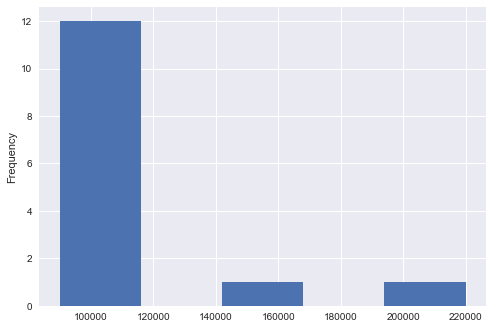

In [27]:
position1['BASE SALARY'].plot(kind='hist', bins=5)

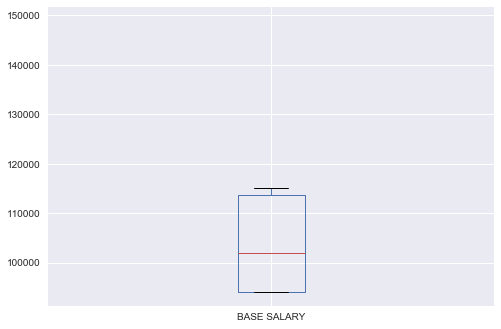

In [20]:
position1['BASE SALARY'].plot(kind='box', legend=True)